In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Load the Auto.csv dataset
auto_df = pd.read_csv('Auto.csv', na_values='?').dropna()

A) Print model summary 

In [4]:
print(auto_df.columns)

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'mpg'],
      dtype='object')


In [5]:
X = auto_df.drop(['mpg'], axis=1)
y = auto_df['mpg']

In [6]:
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

In [7]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 18 Apr 2023   Prob (F-statistic):          2.04e-139
Time:                        23:33:09   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

B) Plot residual plot

In [8]:
y_pred = model.predict(X)
residuals = y - y_pred

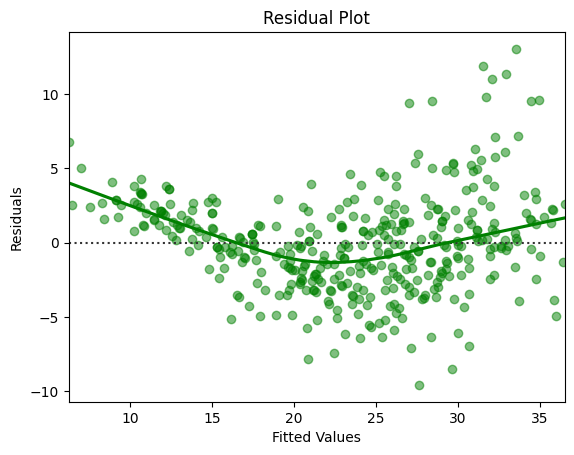

In [12]:
sns.residplot(x=y_pred, y=residuals, lowess=True, color='g', scatter_kws={'alpha': 0.5})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

C) Plot scatter plot showing the fitted line

<AxesSubplot: ylabel='mpg'>

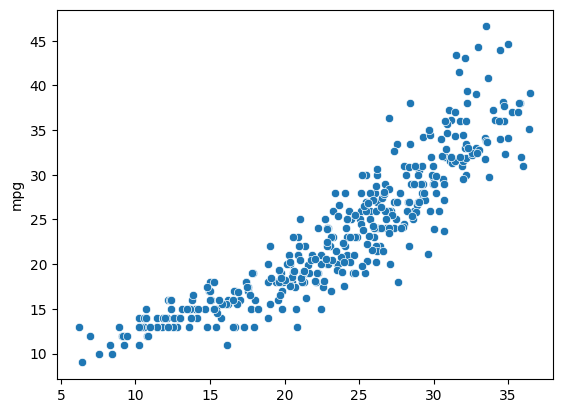

In [13]:
sns.scatterplot(y=y, x=y_pred)

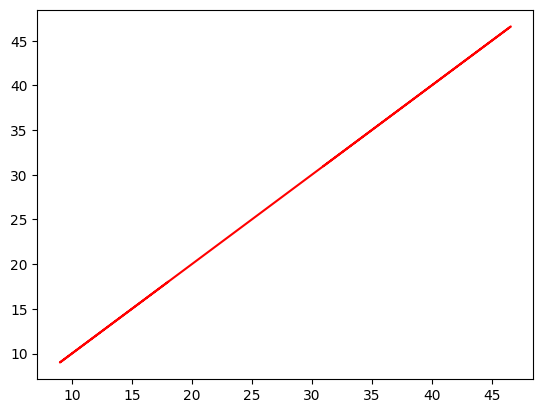

In [14]:
plt.plot(y, y, color='r')

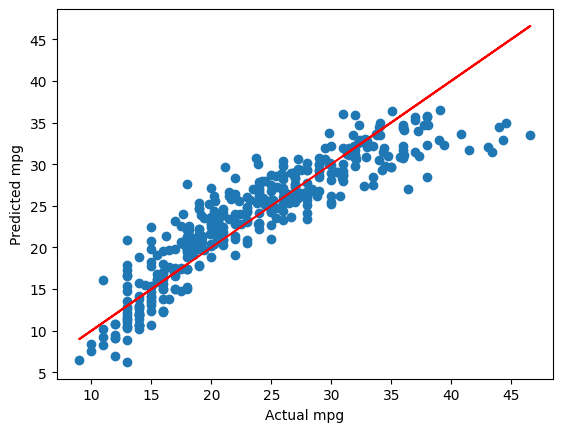

In [19]:
plt.scatter(y, y_pred)
plt.plot(y, y, color='red')
plt.xlabel('Actual mpg')
plt.ylabel('Predicted mpg')
plt.show()